<a href="https://colab.research.google.com/github/obeabi/Stocks_TSA/blob/main/VUN_DFN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 112 kB 7.8 MB/s 
     |████████████████████████████████| 110 kB 45.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 4.0 MB 66.3 MB/s 
     |████████████████████████████████| 128 kB 60.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [62]:
# Install libraries
import pandas as pd
import numpy as np

import scipy 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, fisher_exact, ttest_ind, ttest_1samp, kstest
from scipy.stats.mstats import ks_twosamp
import statsmodels
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


print("libraries installed succesfully!")

libraries installed succesfully!


In [3]:
import yfinance as yahooFinance
 
# Here We are getting Facebook financial information
# We need to pass FB as argument for VUN
GetStockInformation = yahooFinance.Ticker("VUN.TO")
print(type(GetStockInformation.info))
 
# whole python dictionary is printed here
print(GetStockInformation.info)


# Here We are getting Facebook financial information
# We need to pass FB as argument for VUN
GetStockInformation2 = yahooFinance.Ticker("DFN.TO")
print(type(GetStockInformation2.info))
 
# whole python dictionary is printed here
print(GetStockInformation2.info)


<class 'dict'>
{'exchange': 'TOR', 'shortName': 'VANGUARD US TOTAL MARKET IDX ET', 'longName': 'Vanguard U.S. Total Market Index ETF', 'exchangeTimezoneName': 'America/Toronto', 'exchangeTimezoneShortName': 'EST', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '-18000000', 'quoteType': 'ETF', 'symbol': 'VUN.TO', 'messageBoardId': 'finmb_242582003', 'market': 'ca_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': None, 'beta3Year': 1.02, 'profitMargins': None, 'enterpriseToEbitda': None, '52WeekChange': None, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'fundInceptionDate': 1375401600, 'annualReportExpenseRatio': None, 'totalAssets': 5595947008, 'bookValue': None, 'fundFamily': 'Vanguard Investments Canada Inc', 'lastFiscalYearEnd': None, 'netIncomeToCommon': None, 'trailingEps': None, 'lastDividendValue': None, 'SandP52WeekChange': None, 'priceToBook': None, 'nextFiscalYearEnd': None, 'yield': 0.011, 'mostRecentQuarter': None, 'ente

In [4]:
# get all key value pairs that are available FOR VUN.TO ETF
for key, value in GetStockInformation.info.items():
    print(key, ":", value)

exchange : TOR
shortName : VANGUARD US TOTAL MARKET IDX ET
longName : Vanguard U.S. Total Market Index ETF
exchangeTimezoneName : America/Toronto
exchangeTimezoneShortName : EST
isEsgPopulated : False
gmtOffSetMilliseconds : -18000000
quoteType : ETF
symbol : VUN.TO
messageBoardId : finmb_242582003
market : ca_market
annualHoldingsTurnover : None
enterpriseToRevenue : None
beta3Year : 1.02
profitMargins : None
enterpriseToEbitda : None
52WeekChange : None
morningStarRiskRating : None
forwardEps : None
revenueQuarterlyGrowth : None
fundInceptionDate : 1375401600
annualReportExpenseRatio : None
totalAssets : 5595947008
bookValue : None
fundFamily : Vanguard Investments Canada Inc
lastFiscalYearEnd : None
netIncomeToCommon : None
trailingEps : None
lastDividendValue : None
SandP52WeekChange : None
priceToBook : None
nextFiscalYearEnd : None
yield : 0.011
mostRecentQuarter : None
enterpriseValue : None
priceHint : 2
threeYearAverageReturn : 0.078200005
lastSplitDate : None
lastSplitFactor 

In [5]:
# get all key value pairs that are available for DFN.TO ETF
for key, value in GetStockInformation2.info.items():
    print(key, ":", value)

zip : M5K 1K7
sector : Financial Services
longBusinessSummary : Dividend 15 Split Corp. is a close ended equity mutual fund launched by Quadravest Inc. The fund is managed by Quadravest Capital Management. It invests in public equity markets of Canada. The fund spreads its investments across diversified sectors. It benchmarks the performance of its portfolio against the S&P TSX 60 Index. Dividend 15 Split Corp. was formed on January 9, 2004 and is domiciled in Canada.
city : Toronto
phone : 416-304-4440
state : ON
country : Canada
companyOfficers : []
website : https://www.dividend15.com
maxAge : 1
address1 : 77 King Street West
fax : 416-304-4441
industry : Asset Management
address2 : Royal Trust Tower Suite 4500
ebitdaMargins : 0
profitMargins : 0.63508
grossMargins : 1
operatingCashflow : -166692576
revenueGrowth : -0.305
operatingMargins : 0.90933
ebitda : None
targetLowPrice : None
recommendationKey : none
grossProfits : 247274712
freeCashflow : 82848320
targetMedianPrice : None
c

# Retrieve historical ytd market prices for comparison.

In [6]:
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
df = GetStockInformation.history(period="ytd")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-01-04 00:00:00-05:00,83.317990,83.556039,82.683186,83.109695,59900,0.0,0.0,0.0
2022-01-05 00:00:00-05:00,82.921238,83.050188,81.631798,81.631798,88100,0.0,0.0,0.0
2022-01-06 00:00:00-05:00,81.810328,81.810328,81.185438,81.274712,69200,0.0,0.0,0.0
2022-01-07 00:00:00-05:00,81.274713,81.403654,80.382018,80.411774,43400,0.0,0.0,0.0
2022-01-10 00:00:00-05:00,80.342332,80.530792,78.973540,80.530792,94700,0.0,0.0,0.0


In [7]:
# Calculate average daily return ofstock in basis point units
df = df[['Open', 'Close']]
df['daily_return'] = 100*((df['Close'] - df['Open'])/ df['Open'])

df.head()

,Open,Close,daily_return
Date,,,
2022-01-04 00:00:00-05:00,83.317990,83.109695,-0.249999
2022-01-05 00:00:00-05:00,82.921238,81.631798,-1.555018
2022-01-06 00:00:00-05:00,81.810328,81.274712,-0.654705
2022-01-07 00:00:00-05:00,81.274713,80.411774,-1.061756
2022-01-10 00:00:00-05:00,80.342332,80.530792,0.234571


In [8]:
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
df2 = GetStockInformation2.history(period="ytd")
df2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-04 00:00:00-05:00,6.984145,7.019022,6.984145,7.001583,250800,0.0,0.0
2022-01-05 00:00:00-05:00,7.001583,7.036460,6.984145,7.001583,227900,0.0,0.0
2022-01-06 00:00:00-05:00,7.010303,7.053899,6.992865,7.036460,190600,0.0,0.0
2022-01-07 00:00:00-05:00,7.036461,7.080057,7.019022,7.071338,242300,0.0,0.0
2022-01-10 00:00:00-05:00,7.071338,7.080058,7.001584,7.062620,257400,0.0,0.0


In [9]:
# Calculate average daily return ofstock in basis point units
df2 = df2[['Open', 'Close']]
df2['daily_return'] = 100*((df2['Close'] - df2['Open'])/ df2['Open'])

df2.head()

,Open,Close,daily_return
Date,,,
2022-01-04 00:00:00-05:00,6.984145,7.001583,0.249682
2022-01-05 00:00:00-05:00,7.001583,7.001583,0.000000
2022-01-06 00:00:00-05:00,7.010303,7.036460,0.373131
2022-01-07 00:00:00-05:00,7.036461,7.071338,0.495662
2022-01-10 00:00:00-05:00,7.071338,7.062620,-0.123296


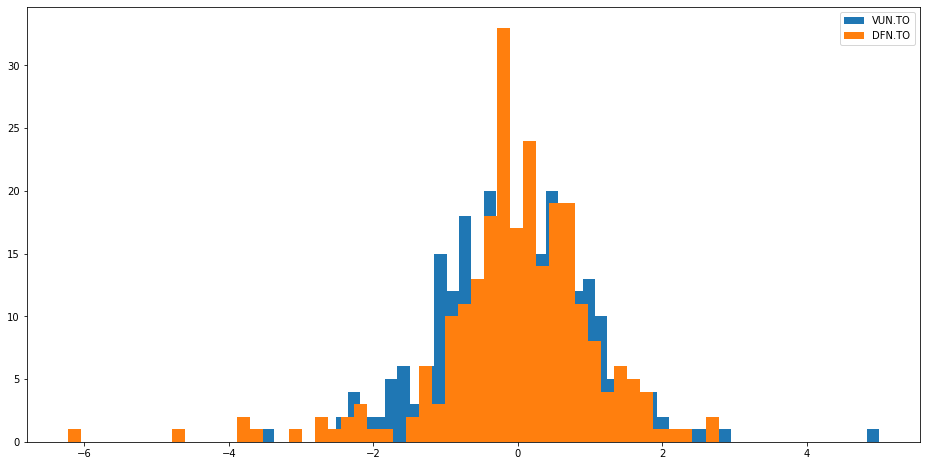

In [70]:
# plotting first histogram
plt.hist(df.daily_return, label='VUN.TO',bins = 50)
 
# plotting second histogram
plt.hist(df2.daily_return, label='DFN.TO', bins = 50)
plt.legend()
 
# Showing the plot using plt.show()
plt.show()

In [11]:
# print etf summary
print('VUN.TO average daily return YTD in basis points units :', df['daily_return'].mean())
print('VUN.TO YTD standard deviation in basis points units :',df['daily_return'].std(skipna = True, ddof = 1))

print('DFN.TO average daily return YTD in basis points units :',df2['daily_return'].mean())
print('DFN.TO YTD standard deviation in basis points units :',df2['daily_return'].std(skipna = True, ddof = 1))

VUN.TO average daily return YTD in basis points units : -0.058879581907700214
VUN.TO YTD standard deviation in basis points units : 1.0900292999841825
DFN.TO average daily return YTD in basis points units : -0.028237888314452595
DFN.TO YTD standard deviation in basis points units : 1.1250049202465873


# Are the data normally distributed?

In [67]:
# Kolmogorov-Smirnov test for goodness of fit for VUN.TO.
_,p_value = kstest(df.daily_return, stats.norm.cdf)
print("The p value is ", p_value)

if p_value < 0.05:
  print("\nReject the null hypothesis. Therefore, The two distributions are not identical i.e. not normal, F(x)!= G(x) for all x.")
else:
  print('\nFail to reject the null hypothesis. Therefore, the two distributions are identical i.e. normal, F(x)= G(x) for all x')

The p value is  0.2878821054921761

Fail to reject the null hypothesis. Therefore, the two distributions are identical, F(x)= G(x) for all x


In [69]:
# Kolmogorov-Smirnov test for goodness of fit for DFN.TO.
_,p_value = kstest(df2.daily_return, stats.norm.cdf)
print("The p value is ", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis. Therefore, The two distributions are not identical i.e. not normal, F(x)!= G(x) for all x.")
else:
  print('Fail to reject the null hypothesis. Therefore, the two distributions are identical i.e.normal, F(x)= G(x) for all x')

The p value is  0.039822105601467594
Reject the null hypothesis. Therefore, The two distributions are not identical i.e. not noral, F(x)!= G(x) for all x.


# Is the mean daily stock return zero or not? How significant is the result?

In [56]:
def hyp_testing(data, pop_mean = 0 ,alpha = 0.01, test = 'one_sample', test_type = 'two_sided' ):

  if test == 'one_sample' and test_type == 'two_sided':
    print("The average or mean of the random varaible investigated is ", data.mean())
    print("The standard deviation of the random varaible of interest is ", data.std())
    t_stats, p_value =  ttest_1samp(data, popmean = pop_mean)
    CI = 100 - (alpha * 100)
    if p_value <= alpha :

      print("Reject the null hypothesis i.e. H0!The result is statisticially significant at {}% confidence interval".format(CI))
     
    else:
      print("Fail to reject the null hypothesis i.e. H0 at a {}% confidence interval". format (CI))
      

In [57]:
# VUN.TO t test: 1 sample ;2-sided test using a 1% significant threshold
# H0: average daily return of VUN.TO = 0
# h1: average daily return of VUN.TO != 0
hyp_testing(df.daily_return.values, pop_mean = 0, alpha = 0.01, test = 'one_sample', test_type = 'two_sided' )

The average or mean of the random varaible investigated is  -0.058879581907700214
The standard deviation of the random varaible of interest is  1.0878294404261089
Fail to reject the null hypothesis i.e. H0 at a 99.0% confidence interval


In [58]:
# DFN.TO t test: 1 sample ;2-sided test using a 1% significant threshold
# H0: average daily return of DFN.TO = 0
# h1: average daily return of DFN.TO != 0
hyp_testing(df2.daily_return.values, pop_mean = 0, alpha = 0.01, test = 'one_sample', test_type = 'two_sided' )

The average or mean of the random varaible investigated is  -0.028237888314452595
The standard deviation of the random varaible of interest is  1.1227344740973688
Fail to reject the null hypothesis i.e. H0 at a 99.0% confidence interval
